In [1]:
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv('datasets/Google_Stock_Price_Train.csv')
# 将股票的开盘价格作为特征
trainset = train_data['Open'].values.reshape(-1, 1)

In [3]:
# 将数据集中的样本特征值进行归一化
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
trainset = sc.fit_transform(trainset)

In [4]:
# 获取样本的个数
n_trainset = len(trainset)
# 设置处理后的每个样本中时间步的个数
n_timesteps = 60
# X_train与y_train分别存储处理过后的样本与标签值
X_train = []
y_train = []
for i in range(n_timesteps, n_trainset):
    X_train.append(trainset[i - n_timesteps: i, 0])
    y_train.append(trainset[i, 0])
# 将处理过后的训练集数据转化为（样本个数，时间步长，特征数）的格式
X_train = np.array(X_train)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
y_train = np.array(y_train)

In [5]:
print(X_train.shape)

(1198, 60, 1)

In [12]:
print(y_train.shape)

(1198,)


In [6]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam
model = Sequential()
# 第一层LSTM
model.add(LSTM(units=64, 
               return_sequences=True,
               input_shape=X_train.shape[1:]))
model.add(Dropout(0.2))
# 第二层LSTM
model.add(LSTM(units=64, 
               return_sequences=True))
model.add(Dropout(0.2))
# 第三层LSTM
model.add(LSTM(units=128,
               return_sequences=False))
model.add(Dropout(0.2))
# 输出层
model.add(Dense(units=1, activation=None))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model.compile(optimizer=Adam(), 
              loss='mse',
              metrics=['mae'])
model.fit(X_train, 
          y_train, 
          epochs=100, 
          verbose=2,
          batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 19s - loss: 0.0397 - mean_absolute_error: 0.1325
Epoch 2/100
 - 15s - loss: 0.0037 - mean_absolute_error: 0.0447
Epoch 3/100
 - 14s - loss: 0.0027 - mean_absolute_error: 0.0390
Epoch 4/100
 - 14s - loss: 0.0030 - mean_absolute_error: 0.0402
Epoch 5/100
 - 14s - loss: 0.0033 - mean_absolute_error: 0.0423
Epoch 6/100
 - 15s - loss: 0.0028 - mean_absolute_error: 0.0388
Epoch 7/100
 - 16s - loss: 0.0032 - mean_absolute_error: 0.0416
Epoch 8/100
 - 16s - loss: 0.0027 - mean_absolute_error: 0.0382
Epoch 9/100
 - 14s - loss: 0.0028 - mean_absolute_error: 0.0387
Epoch 10/100
 - 14s - loss: 0.0026 - mean_absolute_error: 0.0374
Epoch 11/100
 - 14s - loss: 0.0024 - mean_absolute_error: 0.0362
Epoch 12/100
 - 15s - loss: 0.0027 - mean_absolute_error: 0.0382
Epoch 13/100
 - 15s - loss: 0.0023 - mean_absolute_error: 0.0347
Epoch 14/100
 - 14s - loss: 0.0022 - mean_absolute_error: 0.0346
Epoch 15/100
 - 14s - loss: 0.0024 - mean_absolute_

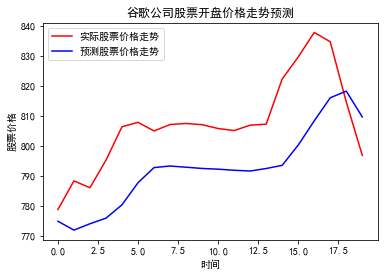

In [13]:
# 对测试集数据进行与训练集数据一样的处理
test_data = pd.read_csv('datasets/Google_Stock_Price_Test.csv')
dataset = pd.concat((train_data['Open'], test_data['Open']), axis = 0)
testset = dataset[len(dataset)-len(test_data)-n_timesteps:].values.reshape(-1,1)
testset = sc.transform(testset)
# 将测试集数据转化为（样本个数，时间步长，特征数）的格式
X_test = []
n_test = len(testset)
for i in range(n_timesteps, n_test):
    X_test.append(testset[i-n_timesteps: i, 0])
X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
# 预测的股票开盘价格
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
# 实际的股票开盘价格
real_stock_price = test_data['Open'].values.reshape(-1, 1)

# 可视化预测股票价格走势与实际价格走势
import matplotlib.pyplot as plt
# 使matplotlib模块能够显示中文字体
plt.rcParams['font.sans-serif']=['SimHei']
# 使用红线画出实际股票价格
plt.plot(real_stock_price, color='red', label='实际股票价格走势')
# 使用蓝线画出预测股票价格
plt.plot(predicted_stock_price, color='blue', label='预测股票价格走势')
plt.title('谷歌公司股票开盘价格走势预测')
plt.xlabel('时间')
plt.ylabel('股票价格')
plt.legend()
plt.show()